# Titanic Survival Prediction - CRISP-DM Framework

## Business Understanding:

### Problem Statement:
The sinking of the RMS Titanic in 1912 resulted in significant loss of life due to insufficient lifeboats. This project aims to analyze passenger data to understand factors influencing survival rates and derive insights for future safety measures in maritime travel.

### Objectives:
1. Analyze Titanic dataset to identify patterns and correlations between attributes and survival rates.
2. Determine the influence of factors like age, gender, and socio-economic class on survival likelihood.
3. Develop a predictive model using machine learning to estimate survival probability based on passenger attributes.
4. Evaluate model performance using appropriate metrics to ensure reliability.
5. Extract actionable insights to understand survival dynamics during maritime disasters and inform safety protocols.

## Data Understanding:

### Data Collection:
- Download the Titanic dataset from Kaggle, containing passenger information including age, gender, socio-economic class, etc.
- Obtain relevant documentation and literature on the Titanic disaster for context.

### Data Exploration:
- Explore dataset to understand structure, features, and quality.
- Identify missing values, outliers, or inconsistencies.

## Data Preparation:

### Data Cleaning:
- Handle missing data through imputation or deletion.
- Address outliers and inconsistencies.

### Feature Engineering:
- Create new features or transform existing ones to enhance predictive power.

### Data Transformation:
- Encode categorical variables and scale numerical features as necessary.
- Split dataset into training and testing sets for model evaluation.

## Modeling:

### Model Selection:
- Choose suitable machine learning algorithms (e.g., logistic regression, decision trees, random forests) for prediction.

### Model Training:
- Train models using the training dataset.

### Model Evaluation:
- Evaluate model performance using appropriate metrics such as accuracy, precision, recall, and ROC-AUC.

## Evaluation:

### Model Comparison:
- Compare performance of different models and select best-performing one.

### Interpretation:
- Interpret results and analyze feature importance to understand factors influencing survival rates.

## Deployment:

### Implementation:
- Deploy chosen model into production or use for predictions.

### Communication:
- Communicate findings and insights through reports, visualizations, or presentations.

### Monitoring:
- Monitor model performance and update as needed.

## Iterative Process:

### Refinement:
- Iterate on analysis and modeling based on feedback and new data.
- Refine model and strategies to improve accuracy and usefulness of insights.

This CRISP-DM framework provides a structured approach to systematically analyze the Titanic dataset, develop predictive models, and derive actionable insights to address the project objectives.

### __Import the required modules__

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### __Load the Dataset__

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## __Hypothesis:__

Null Hypothesis (H0): There is no significant association between socio-economic class (Pclass) and survival rates among Titanic passengers.
Alternate Hypothesis (H1): Passengers in higher socio-economic classes were more likely to survive the Titanic disaster.

## __Research Questions:__

1. Is there a significant difference in survival rates between passengers from different socio-economic classes?
   - **Comparison:** Pclass vs. Survived
   
2. What is the relationship between age and survival likelihood among Titanic passengers?
   - **Comparison:** Age vs. Survived

3. Did gender impact the probability of survival during the Titanic disaster?
   - **Comparison:** Sex vs. Survived

4. Were passengers traveling with family members (siblings, spouses, parents, children) more likely to survive?
   - **Comparison:** SibSp, Parch vs. Survived

5. Did the port of embarkation influence survival rates?
   - **Comparison:** Embarked vs. Survived

# __EDA__

In [3]:
#get no. of rows & columns
df.shape

(891, 12)

In [4]:
# get general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


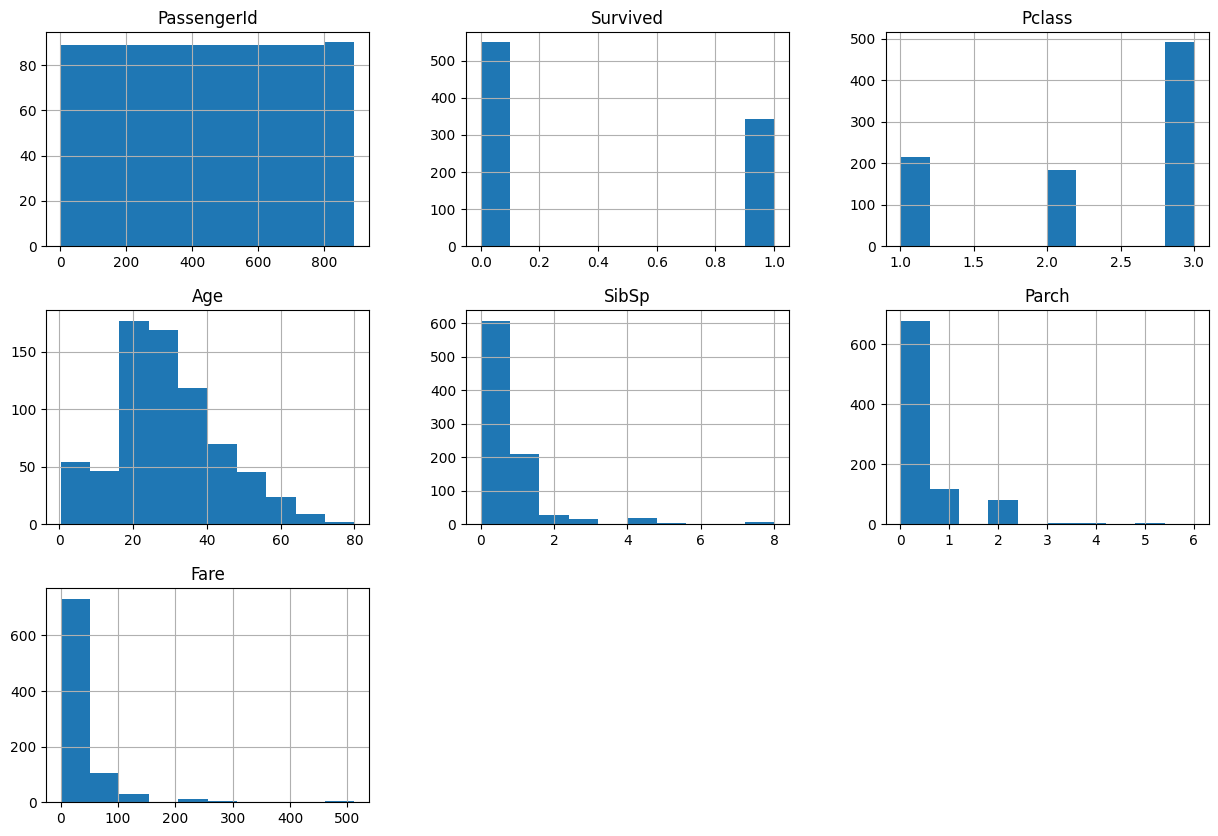

In [6]:
df.hist(figsize=(15,10))
plt.show()

## __Handle the data incosistencies__

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
def identify_columns_to_drop(df, threshold=0.70):
    columns_to_drop = []
    for col in df.columns:
        missing_percentage = df[col].isnull().sum() / len(df)
        if missing_percentage > threshold:
            columns_to_drop.append(col)

    return columns_to_drop

result_train = identify_columns_to_drop(df)
print("Columns to drop in the train dataset:", result_train)

columns_to_drop = identify_columns_to_drop(df)
df.drop(columns=columns_to_drop, inplace=True)

Columns to drop in the train dataset: ['Cabin']


In [10]:
def impute_with_mean_and_mode(df, column_names):
    for column_name in column_names:
        if df[column_name].dtype == 'object':
            imputation_value = df[column_name].mode()[0]
            df[column_name].fillna(imputation_value, inplace=True)
        else:
            imputation_value = df[column_name].mean()
            df[column_name].fillna(imputation_value, inplace=True)

cols = ['Age','Embarked']  # Columns to impute with mean for Age, and mode for categorical column 'Embarked'

# Impute columns in df
impute_with_mean_and_mode(df, cols)


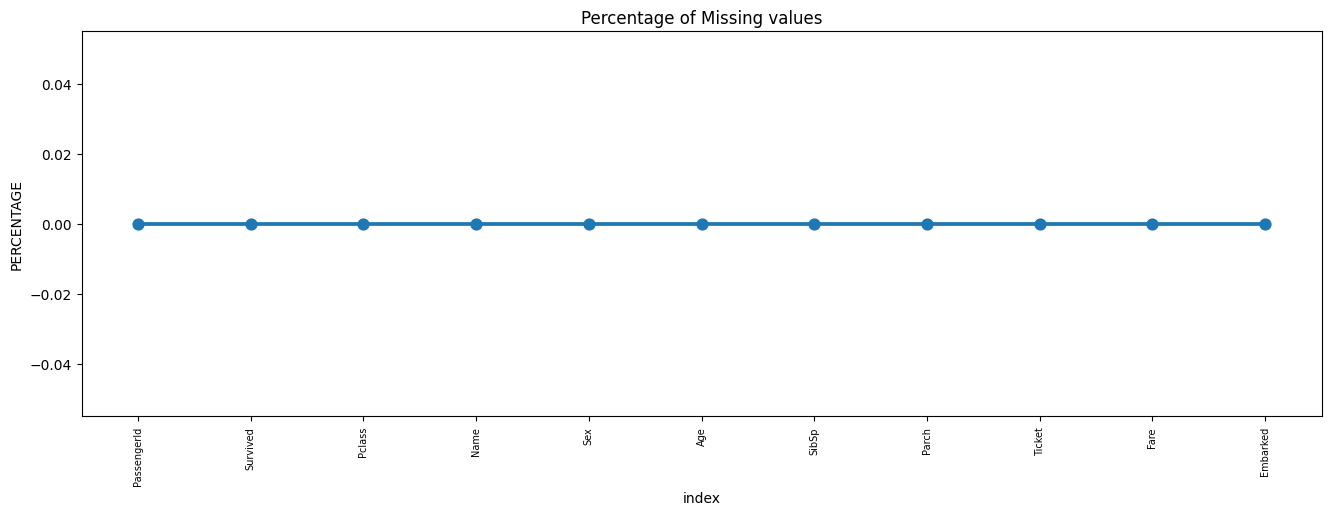

In [11]:
def visualize_missing_percentage(df):
    missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()

    # Plot the percentage of missing values
    plt.figure(figsize=(16, 5))
    ax = sns.pointplot(x='index', y=0, data=missing)
    plt.xticks(rotation=90, fontsize=7)
    plt.title("Percentage of Missing values")
    plt.ylabel("PERCENTAGE")
    plt.show()
    
visualize_missing_percentage(df)

## __Univariate, Bivariate & Multivariate Analysis__

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## __Survived col__

In [13]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

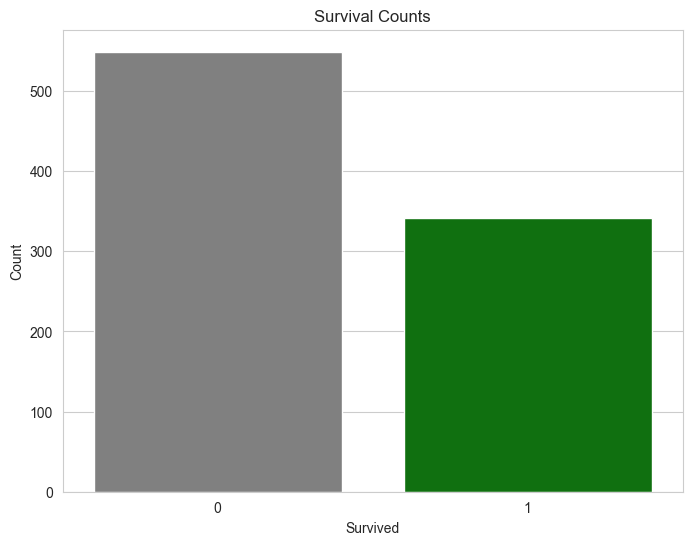

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='Survived', palette=['grey', 'green'],legend=False)
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

__0 - Not Survived__

__1 - Survived__

__62% of the people did not survive__

**The dataset has a class imbalance issue which will be handled before model training to prevent any biases to the more prevalent class**

## __Gender Col__

In [22]:
sex_df = df['Sex'].value_counts()
sex_pct_df = df['Sex'].value_counts(normalize=True)

result_df = pd.concat([sex_df, sex_pct_df], axis=1)
result_df.columns = ['Count', 'Percentage']

result_df

,Count,Percentage
Sex,,
male,577,0.647587
female,314,0.352413


__There are more males than females in the dataset.__

__64% of the people are males__

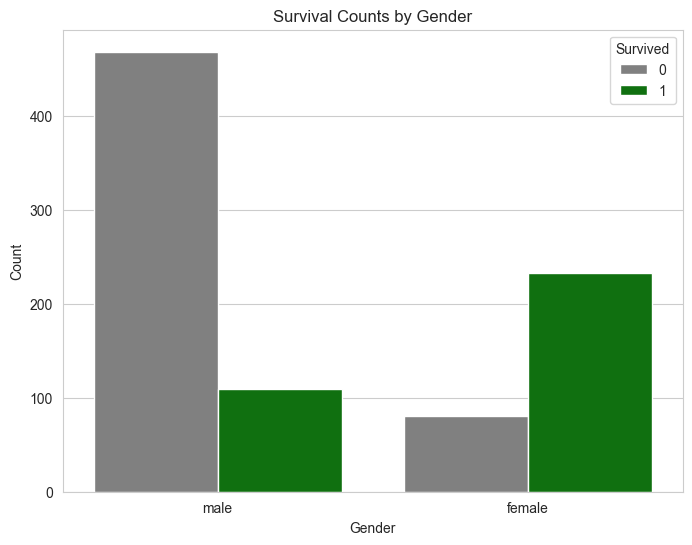

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette=['grey', 'green'],legend=True)
plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

__Most of the people who did not survive were males__

__Most of the people who survived were females__

__Seems like females and children were given first priority to be saved, then male adults were later considered__

## __Passenger Class Col__

In [29]:
class_df = df['Pclass'].value_counts()
class_pct_df = df['Pclass'].value_counts(normalize=True)

result_df = pd.concat([class_df, class_pct_df], axis=1)
result_df.columns = ['Count', 'Percentage']

result_df

,Count,Percentage
Pclass,,
3,491,0.551066
1,216,0.242424
2,184,0.206510


**3rd class has most passengers, maybe to provide labour in the cruise ship as they were 55% of the total population in the ship**



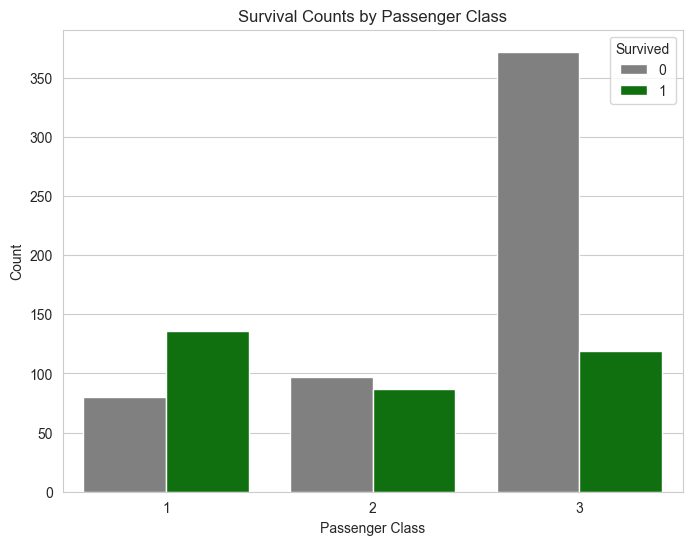

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette=['grey', 'green'],legend=True)
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

**Most people who perished were mostly from 3rd class, seems priority to be saved was given according to class**

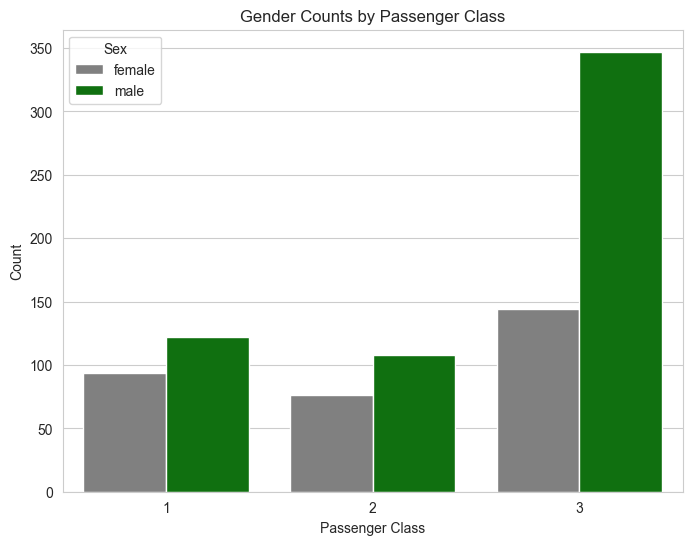

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Sex', palette=['grey', 'green'],legend=True)
plt.title('Gender Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

**3rd class had more males**

## __Age Col__

In [34]:
df['Age'].min(),df['Age'].max()

(0.42, 80.0)

In [39]:
# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80,90]
age_labels = ["{0} - {1}".format(age_bins[i], age_bins[i + 1] - 1) for i in range(len(age_bins) - 1)]

# Create a new column 'Age Group' in your DataFrame
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the counts of each age group
df['age_group'].value_counts()

age_group
20 - 29    397
30 - 39    167
10 - 19    102
40 - 49     89
0 - 9       62
50 - 59     48
60 - 69     19
70 - 79      6
80 - 89      1
Name: count, dtype: int64

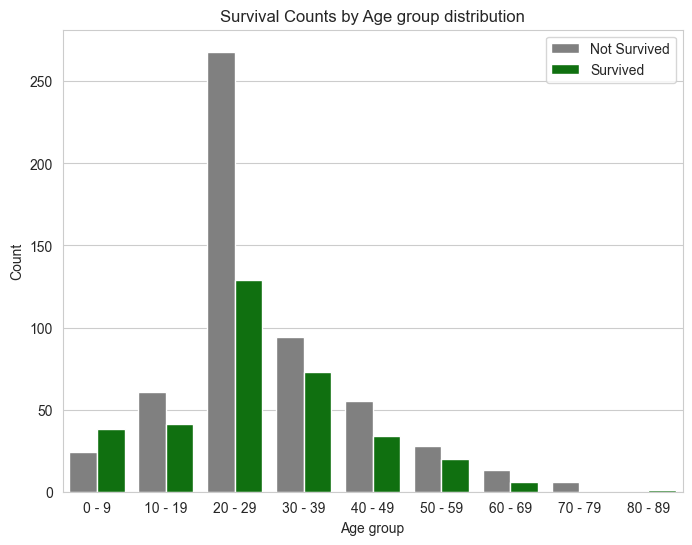

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group', hue='Survived', palette=['grey', 'green'])
plt.title('Survival Counts by Age group distribution')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

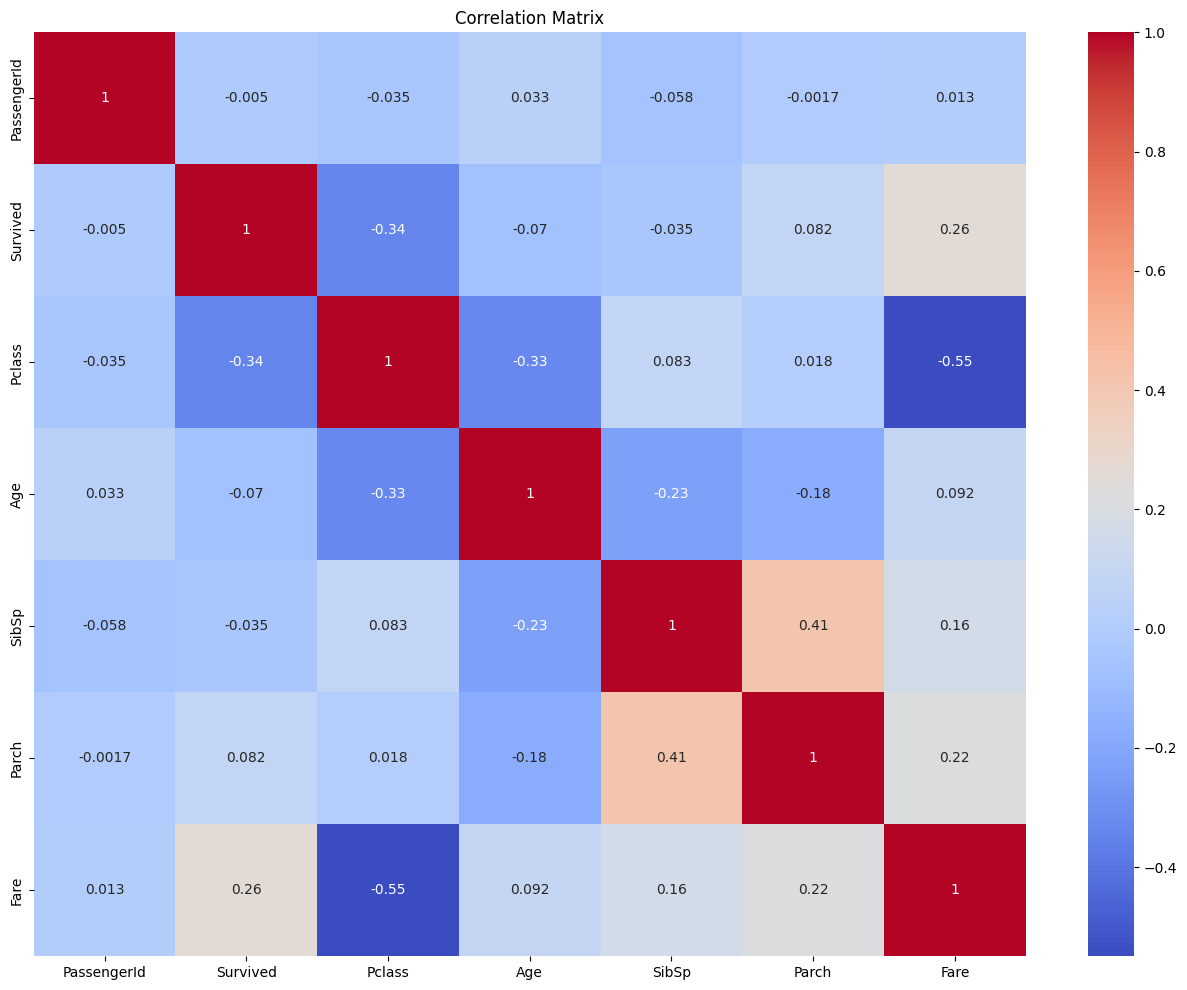

In [42]:
df_corr = df.corr(numeric_only=True)
#Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## __Hypothesis:__

Null Hypothesis (H0): There is no significant association between socio-economic class (Pclass) and survival rates among Titanic passengers.
Alternate Hypothesis (H1): Passengers in higher socio-economic classes were more likely to survive the Titanic disaster.

In [44]:
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Define significance level
alpha = 0.05

# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis: There is a significant association between socio-economic class (Pclass) and survival rates.")
else:
    print("Fail to reject null hypothesis: There is no significant association between socio-economic class (Pclass) and survival rates.")


Chi-square statistic: 102.88898875696056
p-value: 4.549251711298793e-23
Reject null hypothesis: There is a significant association between socio-economic class (Pclass) and survival rates.


## __Research Questions__

1. Is there a significant difference in survival rates between passengers from different socio-economic classes?

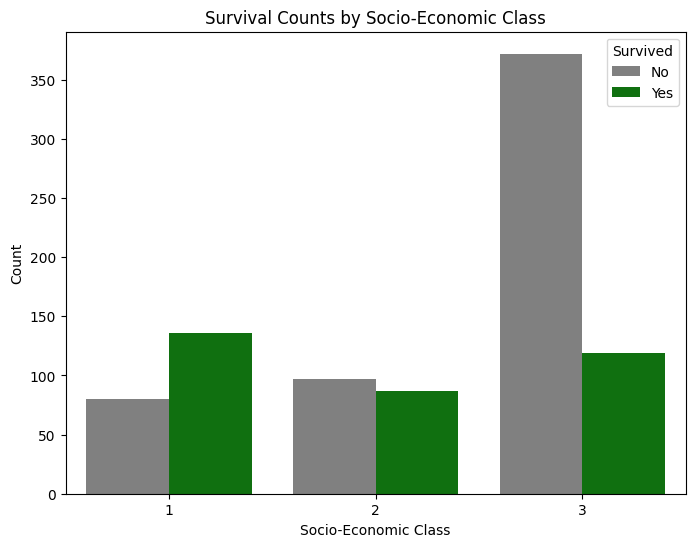

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette=['grey', 'green'])
plt.title('Survival Counts by Socio-Economic Class')
plt.xlabel('Socio-Economic Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


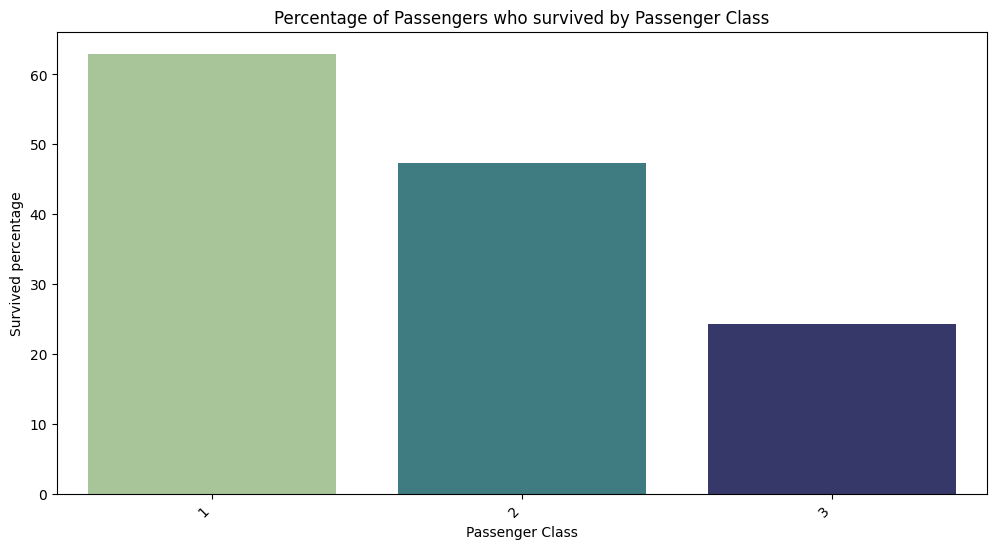

In [54]:
# Create a DataFrame with counts for Employment Status vs. Income Levels
survival_df = df.groupby(['Pclass', 'Survived']).size().reset_index(name='count')

# Calculate the percentage count
total_survival_counts = df.groupby('Pclass').size()
survival_df['percentage'] = (survival_df['count'] / survival_df['Pclass'].map(total_survival_counts) * 100)

# Filter data for individuals above the limit
survived_df = survival_df[survival_df['Survived'] == 1]
survived_df = survived_df.sort_values(by='percentage', ascending=False)

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='percentage', data=survived_df, palette='crest', order=survived_df['Pclass'], hue='Pclass',legend=False)
plt.xlabel('Passenger Class')
plt.ylabel('Survived percentage')
plt.title('Percentage of Passengers who survived by Passenger Class')
plt.xticks(rotation=45, ha='right')
plt.show()

2. What is the relationship between age and survival likelihood among Titanic passengers?

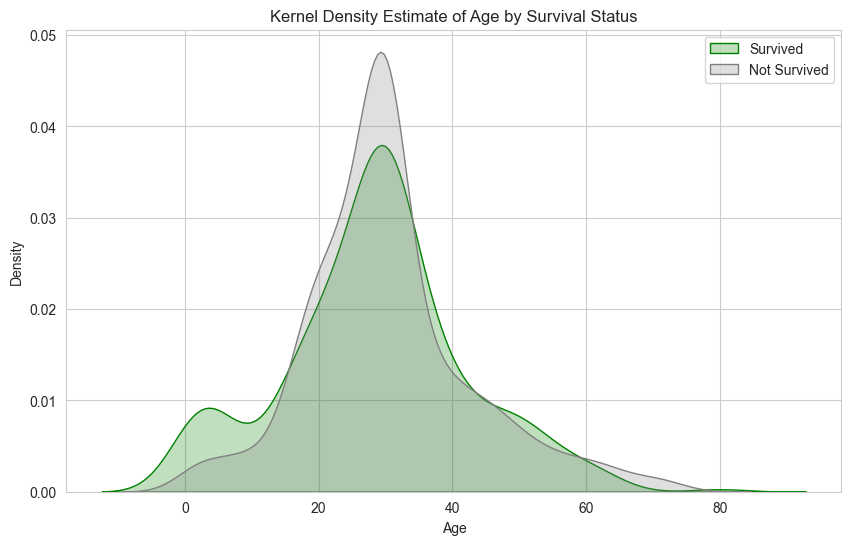

In [57]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', color='green', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', color='grey', fill=True)
plt.title('Kernel Density Estimate of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

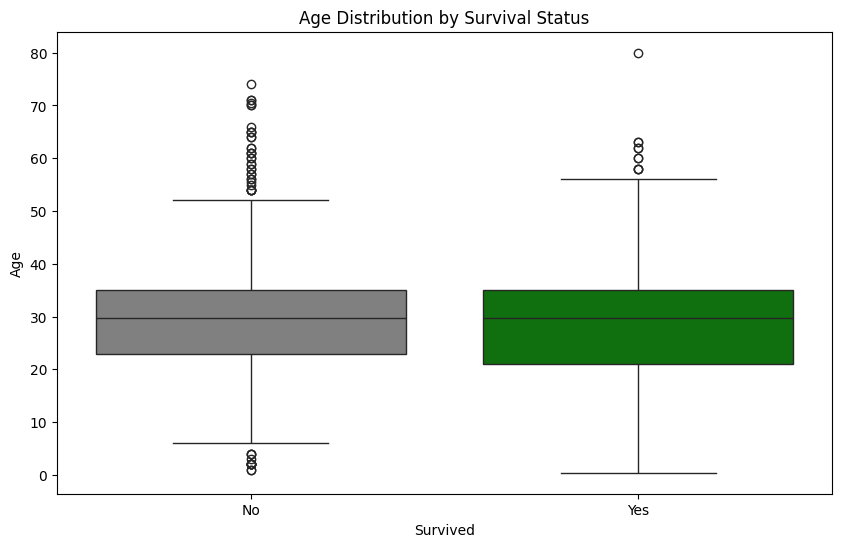

In [47]:
plt.figure(figsize=(10, 6))
# Plot boxplot of age distribution for survivors and non-survivors
sns.boxplot(data=df, x='Survived', y='Age', palette=['grey', 'green'],hue='Survived',legend=False)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

3. Did gender impact the probability of survival during the Titanic disaster?

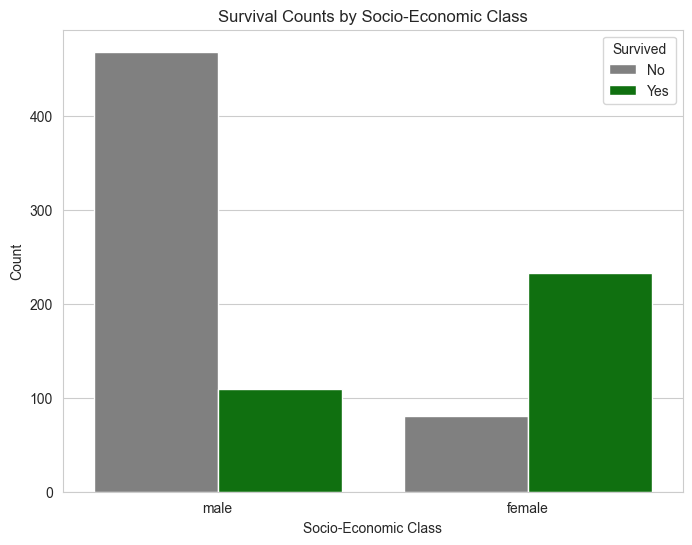

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette=['grey', 'green'])
plt.title('Survival Counts by Socio-Economic Class')
plt.xlabel('Socio-Economic Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

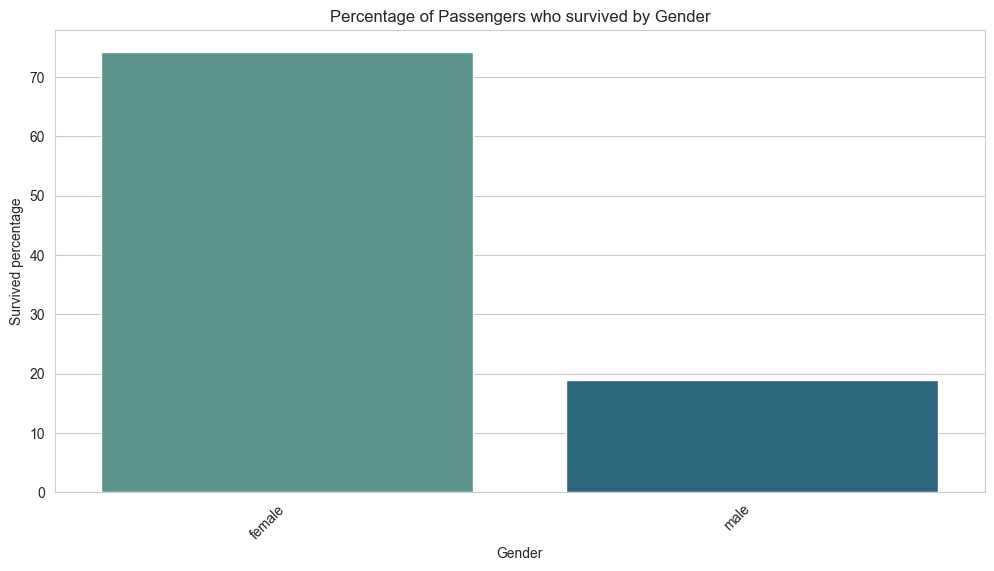

In [60]:
# Create a DataFrame with counts for Employment Status vs. Income Levels
survival_df = df.groupby(['Sex', 'Survived']).size().reset_index(name='count')

# Calculate the percentage count
total_survival_counts = df.groupby('Sex').size()
survival_df['percentage'] = (survival_df['count'] / survival_df['Sex'].map(total_survival_counts) * 100)

# Filter data for individuals above the limit
survived_df = survival_df[survival_df['Survived'] == 1]
survived_df = survived_df.sort_values(by='percentage', ascending=False)

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='percentage', data=survived_df, palette='crest', order=survived_df['Sex'], hue='Sex',legend=False)
plt.xlabel('Gender')
plt.ylabel('Survived percentage')
plt.title('Percentage of Passengers who survived by Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

4. Were passengers traveling with family members (siblings, spouses, parents, children) more likely to survive?

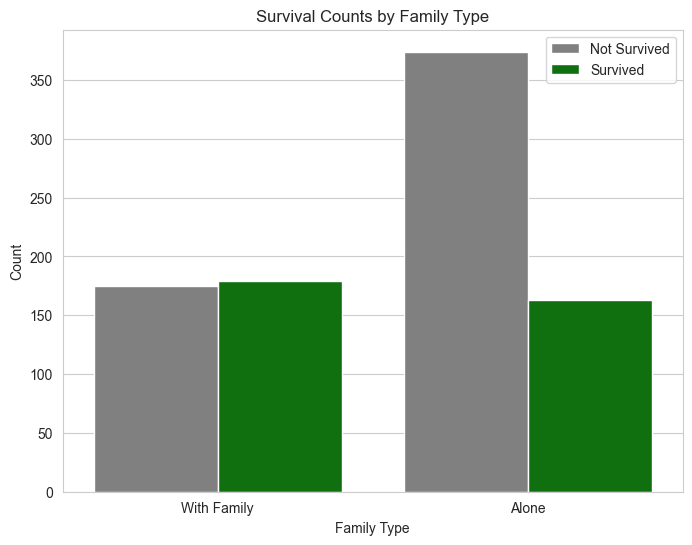

In [62]:
# Create a new feature 'FamilySize' by adding 'SibSp' and 'Parch' columns
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Plus 1 to include the passenger themselves

# Define a function to categorize passengers as 'Alone' or 'With Family'
def categorize_family(size):
    if size == 1:
        return 'Alone'
    else:
        return 'With Family'

df['FamilyType'] = df['FamilySize'].apply(categorize_family)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FamilyType', hue='Survived', palette=['grey', 'green'])
plt.title('Survival Counts by Family Type')
plt.xlabel('Family Type')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

5. Did the port of embarkation influence survival rates?

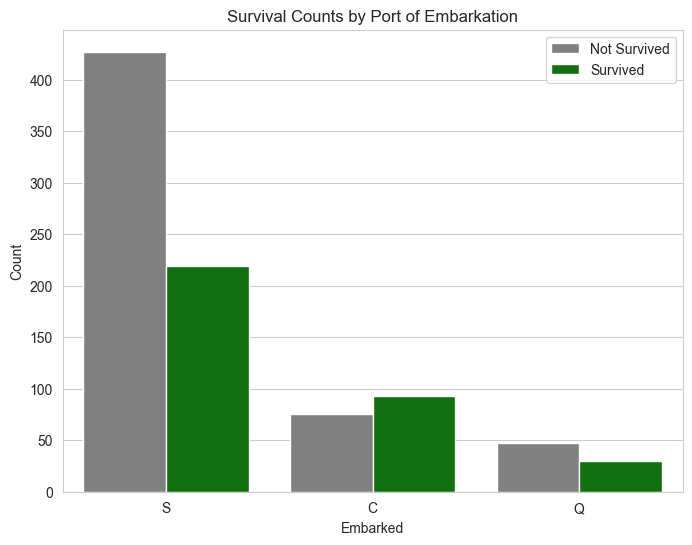

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Embarked', hue='Survived', palette=['grey', 'green'])
plt.title('Survival Counts by Port of Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()